In [1]:
# default_exp plot

In [2]:
import nbdev.showdoc as literacy

In [3]:
#export
import matplotlib
import matplotlib.pyplot as plt
from functools import partial

In [4]:
from librosa import load
import speechsep.utils as utils

# Plotting

In [5]:
#export
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [6]:
#export
class ColorMeshPlotter():
    def __init__(self, **kwargs):
        self._plot = partial(plt.pcolormesh, **kwargs)
    def __call__(self, spec, title='', x_label='', y_label='', fig_size=None):
        setup_graph(title=title, x_label=x_label, y_label=y_label, fig_size=fig_size)
        self._plot(abs(spec[:spec.shape[0]//2]))

In [7]:
#export
cmap_dict = {'red':  ((0.0, 0.0156, 0.0156),
                      (0.3, 1.0, 1.0),
                      (0.6, 1.0, 1.0),
                      (1.0, 1.0, 1.0)),
             'green':((0.0, 0.125, 0.125),
                       (0.3, 1.0, 1.0),
                       (0.6, 1.0, 1.0),
                       (1.0, 1.0, 0.0)),
             'blue': ((0.0, 0.25, 0.25),
                      (0.3, 1.0, 1.0),
                      (0.6, 0.17, 0.17),
                      (1.0, 0.0, 0.0))}
cmap = matplotlib.colors.LinearSegmentedColormap(None,cmap_dict,256)

# Test/Documenation

In [8]:
fn = "/home/holydemon/Music/LJ001-0001.wav"
audio,sr = load(fn)

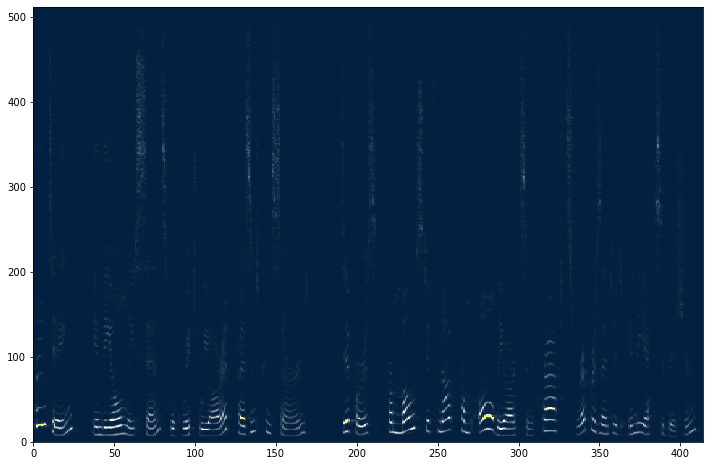

In [9]:
spec = utils.stft(audio, win_mult=2, normalize=True)
specshow = ColorMeshPlotter(cmap=cmap)
specshow(spec, fig_size=[12,8])